In [67]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams

import scipy
from scipy.stats.stats import pearsonr
from scipy.stats import spearmanr,chi2_contingency

import sklearn
from sklearn import preprocessing

In [72]:
%matplotlib inline
rcParams['figure.figsize'] = 12,4
plt.style.use('seaborn-whitegrid')

In [33]:
cars = pd.read_csv('Data/mtcars.csv')
cars.columns = ['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']
cars.index = cars.car_names
cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
car_names,,,,,,,,,,,,
Mazda RX4,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


### Statistic Summaries

In [34]:
cars.sum()

car_names    Mazda RX4Mazda RX4 WagDatsun 710Hornet 4 Drive...
mpg                                                      642.9
cyl                                                        198
disp                                                    7383.1
hp                                                        4694
drat                                                    115.09
wt                                                     102.952
qsec                                                    571.16
vs                                                          14
am                                                          13
gear                                                       118
carb                                                        90
dtype: object

In [35]:
cars.sum(axis=1)

car_names
Mazda RX4              328.980
Mazda RX4 Wag          329.795
Datsun 710             259.580
Hornet 4 Drive         426.135
Hornet Sportabout      590.310
Valiant                385.540
Duster 360             656.920
Merc 240D              270.980
Merc 230               299.570
Merc 280               350.460
Merc 280C              349.660
Merc 450SE             510.740
Merc 450SL             511.500
Merc 450SLC            509.850
Cadillac Fleetwood     728.560
Lincoln Continental    726.644
Chrysler Imperial      725.695
Fiat 128               213.850
Honda Civic            195.165
Toyota Corolla         206.955
Toyota Corona          273.775
Dodge Challenger       519.650
AMC Javelin            506.085
Camaro Z28             646.280
Pontiac Firebird       631.175
Fiat X1-9              208.215
Porsche 914-2          272.570
Lotus Europa           273.683
Ford Pantera L         670.690
Ferrari Dino           379.590
Maserati Bora          694.710
Volvo 142E             288.89

In [36]:
mpg = cars.mpg
mpg.idxmax() # index of the max mpg value

'Toyota Corolla'

In [37]:
gear = cars.gear
gear.value_counts() # get counts of each gear (3, 4, or 5)

3    15
4    12
5     5
Name: gear, dtype: int64

### Using describe to see statistical summary

In [38]:
cars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


### Categorical variables

In [39]:
carb = cars.carb
carb.value_counts()

4    10
2    10
1     7
3     3
8     1
6     1
Name: carb, dtype: int64

In [40]:
cars_cat = cars[['cyl', 'vs', 'am', 'gear', 'carb']]
cars_cat.head(5)

,cyl,vs,am,gear,carb
car_names,,,,,
Mazda RX4,6,0,1,4,4
Mazda RX4 Wag,6,0,1,4,4
Datsun 710,4,1,1,4,1
Hornet 4 Drive,6,1,0,3,1
Hornet Sportabout,8,0,0,3,2


In [41]:
gears_group = cars_cat.groupby('gear')
gears_group.describe()

cyl                                                 vs            ...  \
     count      mean       std  min  25%  50%  75%  max count      mean  ...   
gear                                                                     ...   
3     15.0  7.466667  1.187234  4.0  8.0  8.0  8.0  8.0  15.0  0.200000  ...   
4     12.0  4.666667  0.984732  4.0  4.0  4.0  6.0  6.0  12.0  0.833333  ...   
5      5.0  6.000000  2.000000  4.0  4.0  6.0  8.0  8.0   5.0  0.200000  ...   

       am       carb                                               
      75%  max count      mean       std  min  25%  50%  75%  max  
gear                                                               
3     0.0  0.0  15.0  2.666667  1.175139  1.0  2.0  3.0  4.0  4.0  
4     1.0  1.0  12.0  2.333333  1.302678  1.0  1.0  2.0  4.0  4.0  
5     1.0  1.0   5.0  4.400000  2.607681  2.0  2.0  4.0  6.0  8.0  

[3 rows x 32 columns]

### Changing values to categorical

In [42]:
cars['group'] = pd.Series(cars.gear, dtype='category')
cars.group

car_names
Mazda RX4              4
Mazda RX4 Wag          4
Datsun 710             4
Hornet 4 Drive         3
Hornet Sportabout      3
Valiant                3
Duster 360             3
Merc 240D              4
Merc 230               4
Merc 280               4
Merc 280C              4
Merc 450SE             3
Merc 450SL             3
Merc 450SLC            3
Cadillac Fleetwood     3
Lincoln Continental    3
Chrysler Imperial      3
Fiat 128               4
Honda Civic            4
Toyota Corolla         4
Toyota Corona          3
Dodge Challenger       3
AMC Javelin            3
Camaro Z28             3
Pontiac Firebird       3
Fiat X1-9              4
Porsche 914-2          5
Lotus Europa           5
Ford Pantera L         5
Ferrari Dino           5
Maserati Bora          5
Volvo 142E             4
Name: group, dtype: category
Categories (3, int64): [3, 4, 5]

In [43]:
cars.group.value_counts()

3    15
4    12
5     5
Name: group, dtype: int64

### Using crosstabs

In [44]:
pd.crosstab(cars.am, cars.gear)

gear,3,4,5
am,,,
0,15,4,0
1,0,8,5


### Pearson Correlation Intro

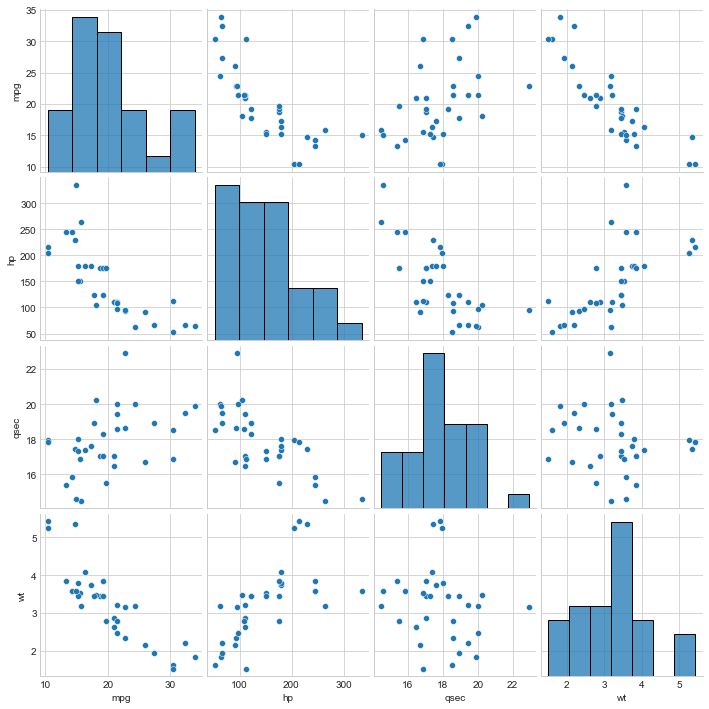

In [48]:
df =  cars[['mpg', 'hp', 'qsec', 'wt']]
sb.pairplot(df)

### Using Scipy for Pearson coefficient

In [51]:
pearsonr_coefficient, p_value = pearsonr(cars.mpg, cars.hp)
print(f'Pearson Correlation Coefficient: {pearsonr_coefficient:0.3f}')

Pearson Correlation Coefficient: -0.776


In [53]:
pearsonr_coefficient, p_value = pearsonr(cars.mpg, cars.qsec)
print(f'Pearson Correlation Coefficient: {pearsonr_coefficient:0.3f}')

Pearson Correlation Coefficient: 0.419


In [54]:
pearsonr_coefficient, p_value = pearsonr(cars.mpg, cars.wt)
print(f'Pearson Correlation Coefficient: {pearsonr_coefficient:0.3f}')

Pearson Correlation Coefficient: -0.868


### Seaborn Heatmap visualization of Pearson correlation

<AxesSubplot:>

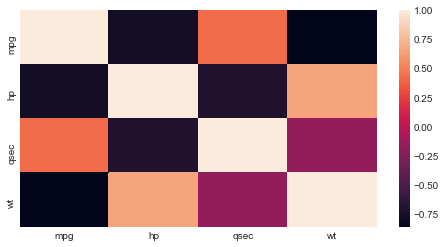

In [56]:
df_corr = df.corr()
sb.heatmap(df_corr, xticklabels=df_corr.columns.values, yticklabels=df_corr.columns.values)

### Spearman Rank Correlation

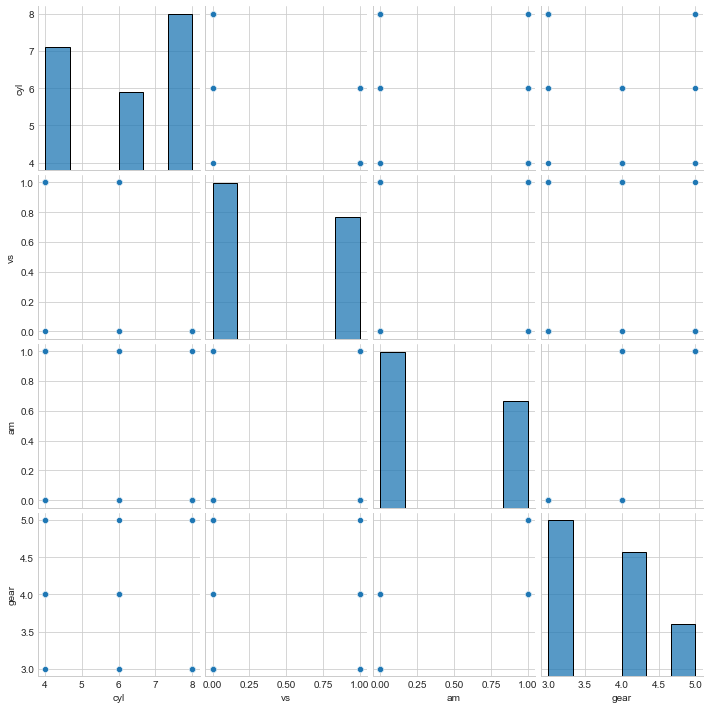

In [59]:
df = cars[['cyl', 'vs', 'am', 'gear']]
sb.pairplot(df)

In [60]:
spearmanr_coefficient, p_value = spearmanr(cars.cyl, cars.vs)
print(f'Spearman Rank Correlation Coefficient: {spearmanr_coefficient:0.3f}')

Spearman Rank Correlation Coefficient: -0.814


In [61]:
spearmanr_coefficient, p_value = spearmanr(cars.cyl, cars.am)
print(f'Spearman Rank Correlation Coefficient: {spearmanr_coefficient:0.3f}')

Spearman Rank Correlation Coefficient: -0.522


In [62]:
spearmanr_coefficient, p_value = spearmanr(cars.cyl, cars.gear)
print(f'Spearman Rank Correlation Coefficient: {spearmanr_coefficient:0.3f}')

Spearman Rank Correlation Coefficient: -0.564


### Chi-Square Test for Independence

In [64]:
table = pd.crosstab(cars.cyl, cars.am)

chi2, p_value, dof, expected = chi2_contingency(table.values)
print(f'Chi-Square Statistic {chi2:0.3f}, p value {p_value:0.3f}')

Chi-Square Statistic 8.741, p value 0.013


In [65]:
table = pd.crosstab(cars.cyl, cars.vs)

chi2, p_value, dof, expected = chi2_contingency(table.values)
print(f'Chi-Square Statistic {chi2:0.3f}, p value {p_value:0.3f}')

Chi-Square Statistic 21.340, p value 0.000


In [66]:
table = pd.crosstab(cars.cyl, cars.gear)

chi2, p_value, dof, expected = chi2_contingency(table.values)
print(f'Chi-Square Statistic {chi2:0.3f}, p value {p_value:0.3f}')

Chi-Square Statistic 18.036, p value 0.001


### Normalizing and Isolating variables

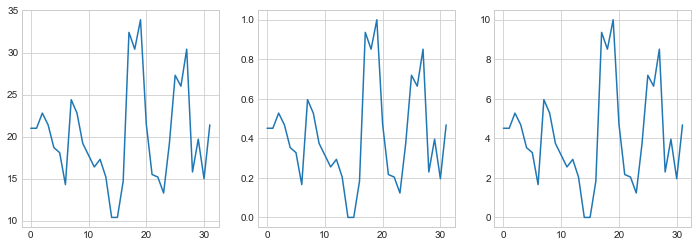

In [85]:
cars = cars.reset_index(drop=True) # Will make plots look better

mpg_matrix = cars.mpg.values.reshape(-1, 1) # One column matrix reshape
scaled = preprocessing.MinMaxScaler()
scaled_mpg = scaled.fit_transform(mpg_matrix)
scaled10 = preprocessing.MinMaxScaler(feature_range=(0,10)) # Look at y axis
scaled_mpg10 = scaled10.fit_transform(mpg_matrix)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.plot(cars.mpg)
ax2.plot(scaled_mpg)
ax3.plot(scaled_mpg10)

### Scaling Features

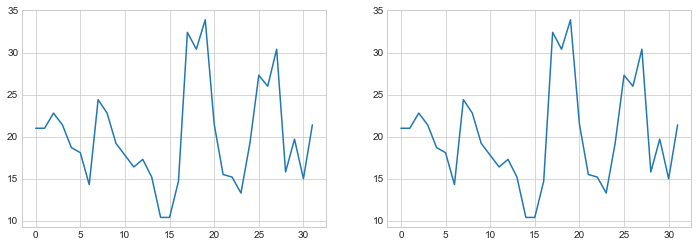

In [86]:
standardized_mpg = preprocessing.scale(cars.mpg, axis=0, with_mean=False, with_std=False)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(cars.mpg)
ax2.plot(standardized_mpg)

In [87]:
iris = pd.read_csv('Data/iris.data.csv')
iris.columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Species']
iris.head()

,Sepal length,Sepal width,Petal length,Petal width,Species
0,4.9,3.0,1.4,0.2,setosa
1,4.7,3.2,1.3,0.2,setosa
2,4.6,3.1,1.5,0.2,setosa
3,5.0,3.6,1.4,0.2,setosa
4,5.4,3.9,1.7,0.4,setosa


In [95]:
data = iris.iloc[:, 0:4].values
target = iris.iloc[:, 4].values

### Identifying outliers with Tukey boxplot

[]

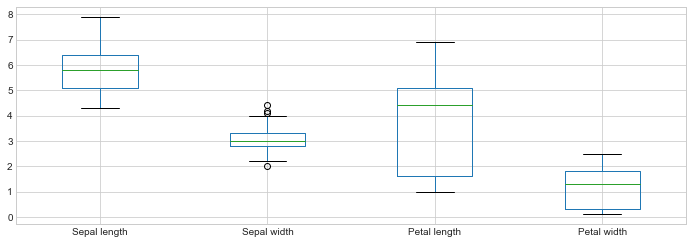

In [89]:
iris.boxplot(return_type='dict')
plt.plot()

In [90]:
sepal_width = data[:,1]
iris_outliers = (sepal_width > 4) # Approximate value of the Sepal width top whisker
iris[iris_outliers]

,Sepal length,Sepal width,Petal length,Petal width,Species
14,5.7,4.4,1.5,0.4,setosa
31,5.2,4.1,1.5,0.1,setosa
32,5.5,4.2,1.4,0.2,setosa


In [92]:
iris_outliers = (sepal_width < 2.05) # Approximate value of the Sepal width bottom whisker
iris[iris_outliers]

,Sepal length,Sepal width,Petal length,Petal width,Species
59,5.0,2.0,3.5,1.0,versicolor


### Multivariate Outlier Detection

<AxesSubplot:xlabel='Species', ylabel='Sepal length'>

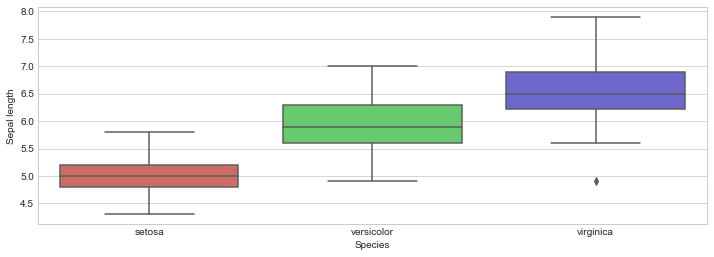

In [97]:
sb.boxplot(data=iris, x='Species', y='Sepal length', palette='hls')

### With Scatter Plot

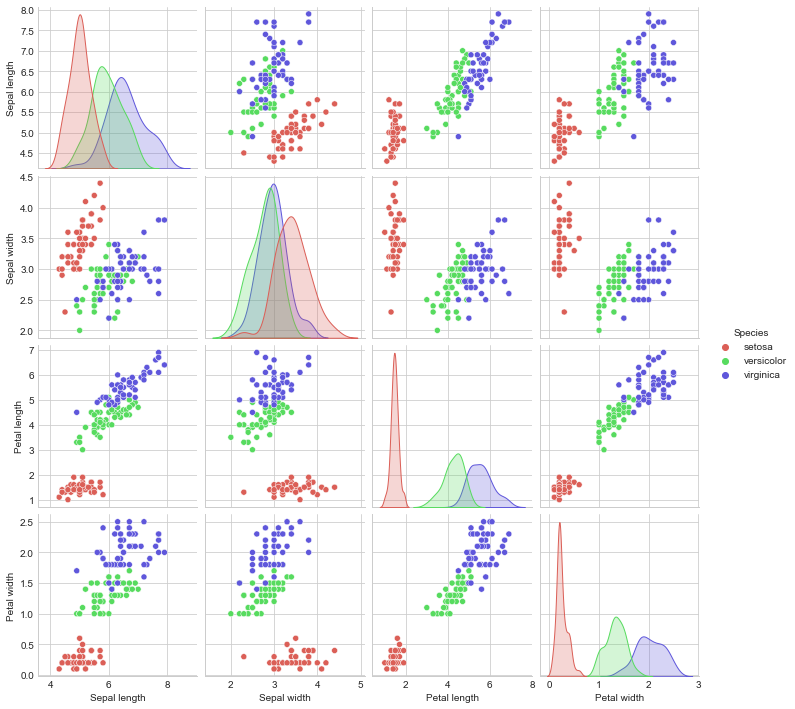

In [98]:
sb.pairplot(iris, hue='Species', palette='hls')